In [1]:
import scipy.stats as stats

f_statistic = 1.4  # The F-statistic value you've calculated
df1 = 2            # Degrees of freedom for the numerator (between groups)
df2 = 6           # Degrees of freedom for the denominator (within groups)

p_value = stats.f.sf(f_statistic, df1, df2)
print("P-value:", p_value)

P-value: 0.31696093163035305


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url).dropna(subset=['Age'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Age ~ Pclass', data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df           F        PR(>F)
Pclass     20511.429755    1.0  112.386893  1.756699e-24
Residual  129945.206190  712.0         NaN           NaN


In [5]:
import scipy.stats as stats

for class1,class2 in [(1,2),(2,3),(3,1)]: 
  print(class1,class2)
  print(stats.ttest_ind(df[df['Pclass'] == class1]['Age'], df[df['Pclass'] == class2]['Age']))

1 2
Ttest_indResult(statistic=5.485187676773201, pvalue=7.835568991415144e-08)
2 3
Ttest_indResult(statistic=3.927800191020872, pvalue=9.715078600777852e-05)
3 1
Ttest_indResult(statistic=-10.849122601201033, pvalue=6.134470007830625e-25)


,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


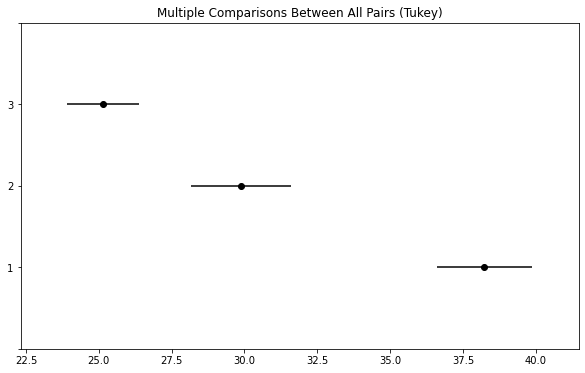

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05) 

tukey.plot_simultaneous()

plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

pd.DataFrame(tukey.summary())  